<a href="https://colab.research.google.com/github/sajirigokak/ML-Data-Cleaning-and-Feature-Selection/blob/main/ML_Data_Cleaning_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!pip install eli5

In [96]:
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import tree
import sklearn.metrics as sm
# import warnings
# warnings.filterwarnings("ignore")

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Uploading Laptops dataset


In [98]:
url = 'https://raw.githubusercontent.com/sajirigokak/ML-Data-Cleaning-and-Feature-Selection/main/laptops.csv'
df = pd.read_csv(url)
df.head()


,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


In [99]:
# df = pd.read_csv("laptops.csv", sep = "," )
# df2= pd.read_csv("laptops.csv", sep = "," )

# df.head()


The read_csv() is a function in pandas library used to read a CSV file and create a dataframe from it.

###  Q. What are the data types? (Only numeric and categorical)

In [100]:
#Checkingthe data types

df.dtypes


CompanyName          object
TypeOfLaptop         object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [101]:
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [102]:
#Print list of categorical and numerical columns
print(" Categorical Variables are:                ")
for row,col in enumerate(categorical_columns):
    print(f'{row+1}. {col}')
print("\n")
print("Numerical Variables are:                 ")
for row,col in enumerate(numeric_columns):
    print(f'{row+1}. {col}')

 Categorical Variables are:                
1. CompanyName
2. TypeOfLaptop
3. ScreenResolution
4. Cpu
5. Ram
6. Memory
7. Gpu
8. OpSys


Numerical Variables are:                 
1. Inches
2. Weight
3. Price


### Q. Are there missing values?

In [103]:
df.isnull().sum()

CompanyName         0
TypeOfLaptop        0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

There are no any null values in the dataset.

In [104]:
df.isna().sum()

CompanyName         0
TypeOfLaptop        0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

There are no missing values in dependent as well as independent variables.

In [105]:
df = df.drop_duplicates()

<ipython-input-106-2b2e225e3428>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


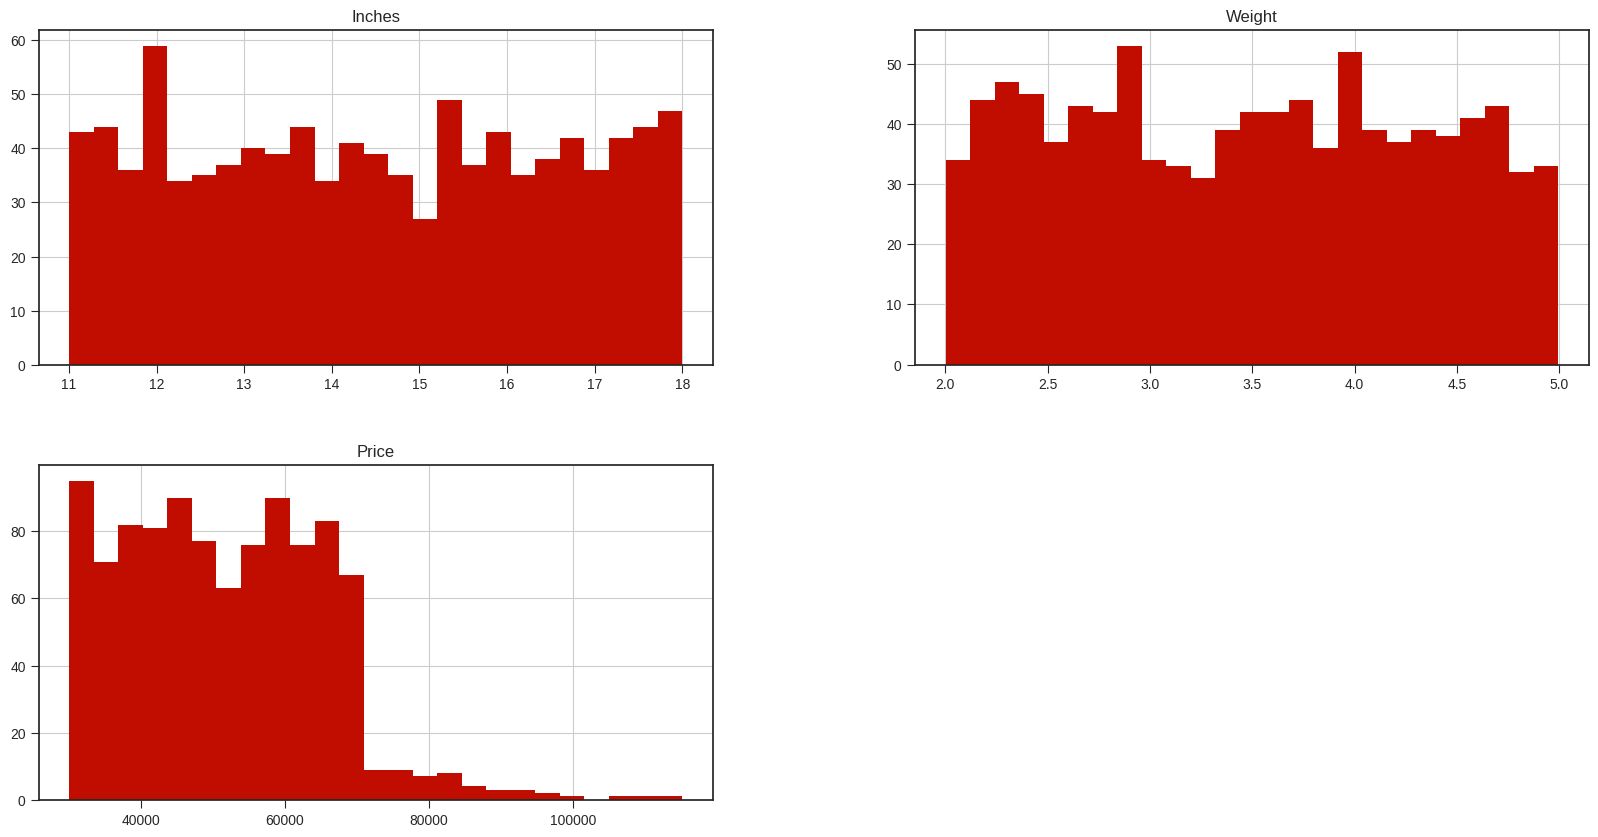

In [106]:
plt.style.use('seaborn-ticks')

df.hist(bins=25, figsize=(20,10), color='#c00d00')
plt.show();

<Figure size 800x500 with 0 Axes>

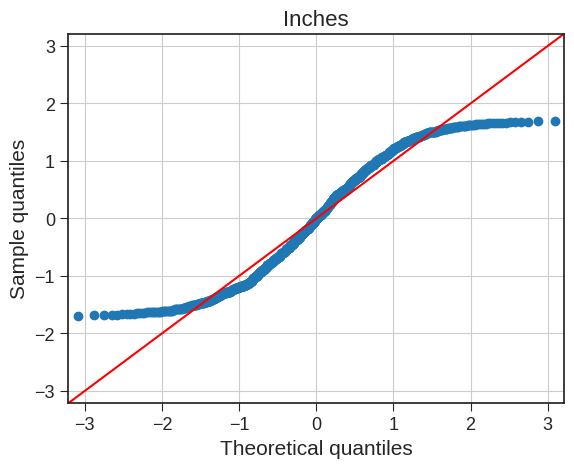

<Figure size 800x500 with 0 Axes>

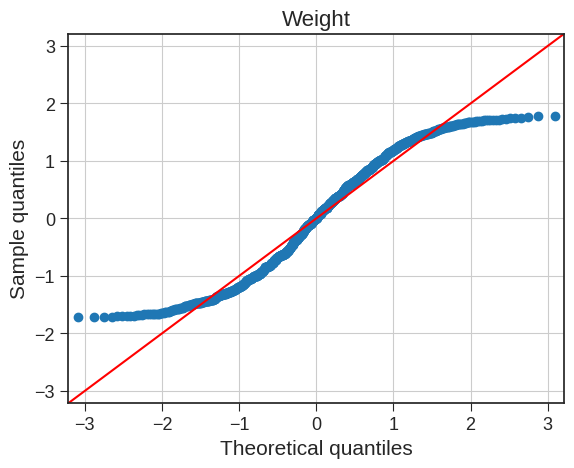

<Figure size 800x500 with 0 Axes>

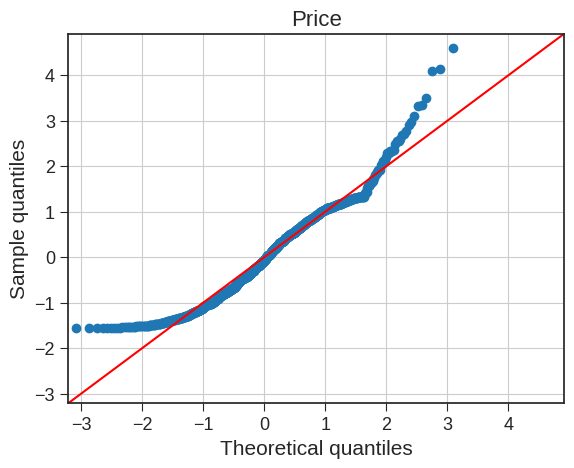

In [107]:
# From above we can observe the likely distributions of all the numeric variable
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


# Check normality of independent variables
data_norm=df[['Inches','Weight','Price']]

for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("{}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


### Q. What are the likely distributions of the numeric variables?

Inches and weight have somewhat normal distribution.

In [108]:
df['CompanyName']= df['CompanyName'].astype("category").cat.codes
df['TypeOfLaptop'] = df['TypeOfLaptop'].astype("category").cat.codes
df['ScreenResolution'] = df['ScreenResolution'].astype("category").cat.codes
df['Cpu']= df['Cpu'].astype("category").cat.codes
df['Ram'] = df['Ram'].astype("category").cat.codes
df['Memory'] = df['Memory'].astype("category").cat.codes
df['Gpu'] = df['Gpu'].astype("category").cat.codes
df['OpSys'] = df['OpSys'].astype("category").cat.codes

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   int8   
 1   TypeOfLaptop      1000 non-null   int8   
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   int8   
 4   Cpu               1000 non-null   int8   
 5   Ram               1000 non-null   int8   
 6   Memory            1000 non-null   int8   
 7   Gpu               1000 non-null   int8   
 8   OpSys             1000 non-null   int8   
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), int8(8)
memory usage: 39.1 KB


,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,5,1,17.040680,5,6,0,15,1,0,2.064834,35844.099371
1,3,0,16.542395,2,5,0,0,1,1,4.060656,37019.059051
2,7,5,17.295294,2,9,3,3,1,0,2.901689,33329.360341
3,5,0,11.526203,0,6,1,14,1,2,2.914843,68631.102486
4,6,2,12.649634,2,5,3,15,0,2,4.341995,33842.479566
...,...,...,...,...,...,...,...,...,...,...,...
995,7,2,16.242566,3,0,3,1,0,2,4.685053,40254.533272
996,6,5,17.450809,1,4,3,12,2,4,3.934182,57272.697780
997,8,3,13.761288,3,2,1,0,2,2,4.047468,48214.606894
998,2,4,11.038000,5,7,0,2,1,1,3.669825,58926.553683


### Q. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

### 1. Univariate Selction

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:10]
y = df.iloc[:,-1]
y=y.astype('int')
# y = pd.DataFrame(y)
y.head(10)
y.describe()

count      1000.000000
mean      51601.752000
std       13802.841794
min       30060.000000
25%       40376.500000
50%       50683.500000
75%       61896.750000
max      115137.000000
Name: Price, dtype: float64

In [110]:
X.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,5,1,17.040680,5,6,0,15,1,0,2.064834
1,3,0,16.542395,2,5,0,0,1,1,4.060656
2,7,5,17.295294,2,9,3,3,1,0,2.901689
3,5,0,11.526203,0,6,1,14,1,2,2.914843
4,6,2,12.649634,2,5,3,15,0,2,4.341995


In [111]:
#Applying SelectKBest class to extract top features
bestFeatures = SelectKBest(score_func= chi2, k = 8)
fit = bestFeatures.fit(X,y)

In [112]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [113]:
#Conact two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,CompanyName,1615.789767
1,TypeOfLaptop,1168.220452
2,Inches,289.898403
3,ScreenResolution,1195.546238
4,Cpu,1768.624050
5,Ram,824.568576
6,Memory,3207.729659
7,Gpu,668.898910
8,OpSys,994.333995
9,Weight,207.377074


In [114]:
#Ordering methods from highest importance to lowest
print(featureScores.nlargest(10,'Score'))

              Specs        Score
6            Memory  3207.729659
4               Cpu  1768.624050
0       CompanyName  1615.789767
3  ScreenResolution  1195.546238
1      TypeOfLaptop  1168.220452
8             OpSys   994.333995
5               Ram   824.568576
7               Gpu   668.898910
2            Inches   289.898403
9            Weight   207.377074


### 2. Feature Importance

In [115]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [116]:
print(model.feature_importances_)

[0.10327489 0.09098464 0.13162334 0.09232289 0.11127047 0.07032338
 0.12174406 0.06178747 0.08597442 0.13069442]


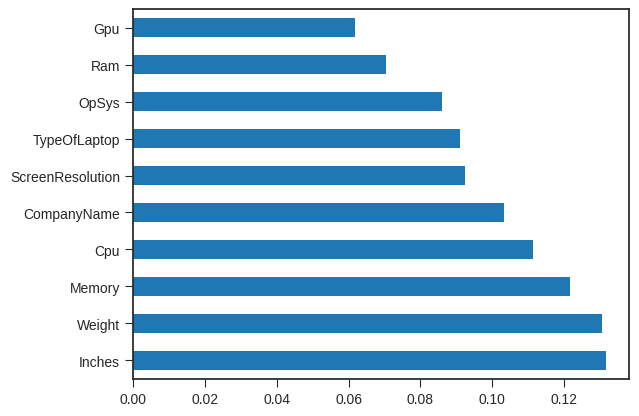

In [117]:
#Plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

### 3. Correlation Matrix with HeatMap

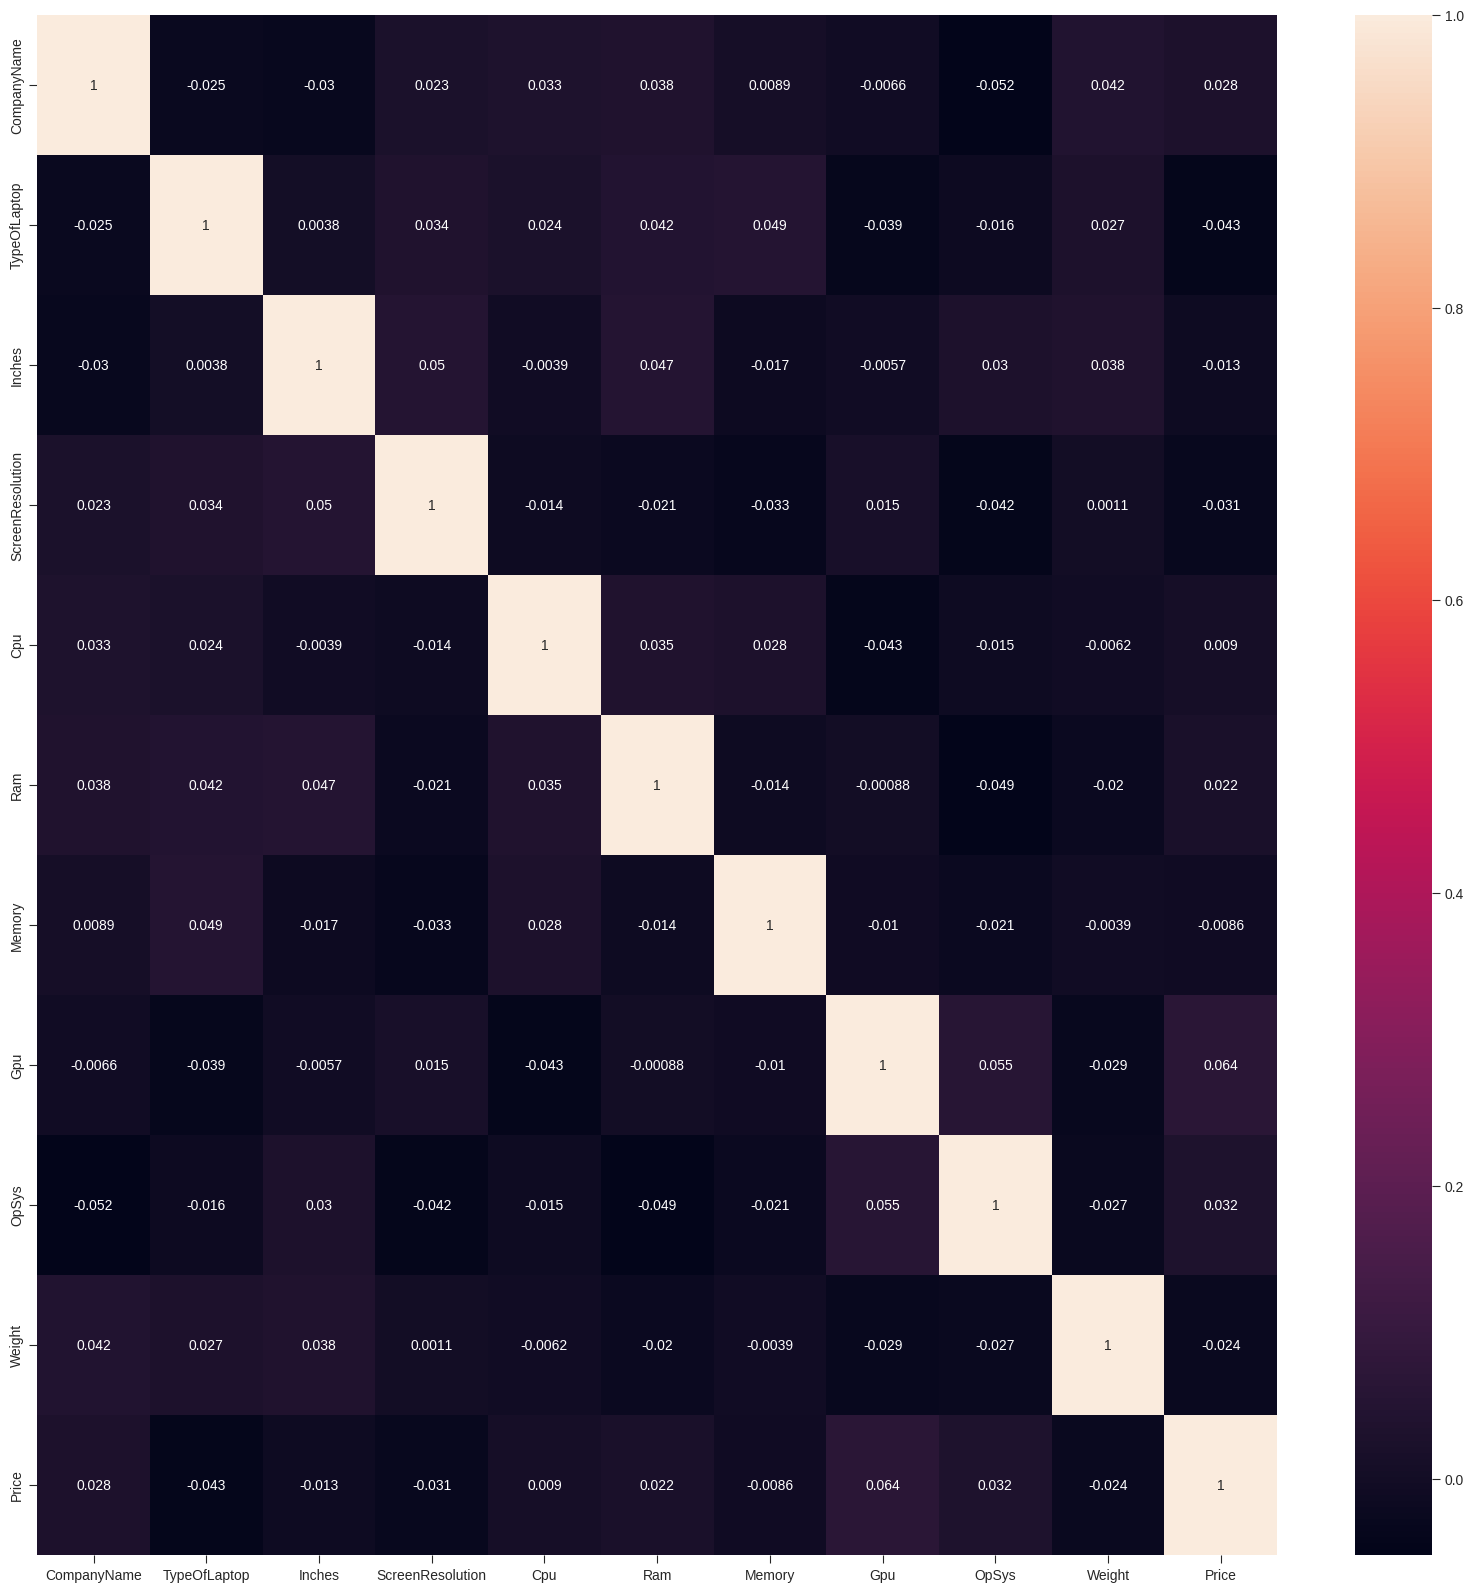

In [118]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heatmap
g = sns.heatmap(df[top_corr_features].corr(), annot= True)

### Q. Which independent variables have missing data? How much?


There are no null or nan values in the dataset, no missing data.

### Outlier Treatment

### Residual Plots
Residual Plot is strong method to detect outliers, non-linear data and detecting data for regression models. The below charts show the residual plots for each feature with the price.
A ideal Residual Plot, the red line would be horizontal. Based on the below charts, most features are non-linear. On the other hand, there are not many outliers in each feature.

In [119]:
df_x, df_y = df.iloc[:,:10], df.iloc[:,-1]

In [120]:
df_x

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,5,1,17.040680,5,6,0,15,1,0,2.064834
1,3,0,16.542395,2,5,0,0,1,1,4.060656
2,7,5,17.295294,2,9,3,3,1,0,2.901689
3,5,0,11.526203,0,6,1,14,1,2,2.914843
4,6,2,12.649634,2,5,3,15,0,2,4.341995
...,...,...,...,...,...,...,...,...,...,...
995,7,2,16.242566,3,0,3,1,0,2,4.685053
996,6,5,17.450809,1,4,3,12,2,4,3.934182
997,8,3,13.761288,3,2,1,0,2,2,4.047468
998,2,4,11.038000,5,7,0,2,1,1,3.669825


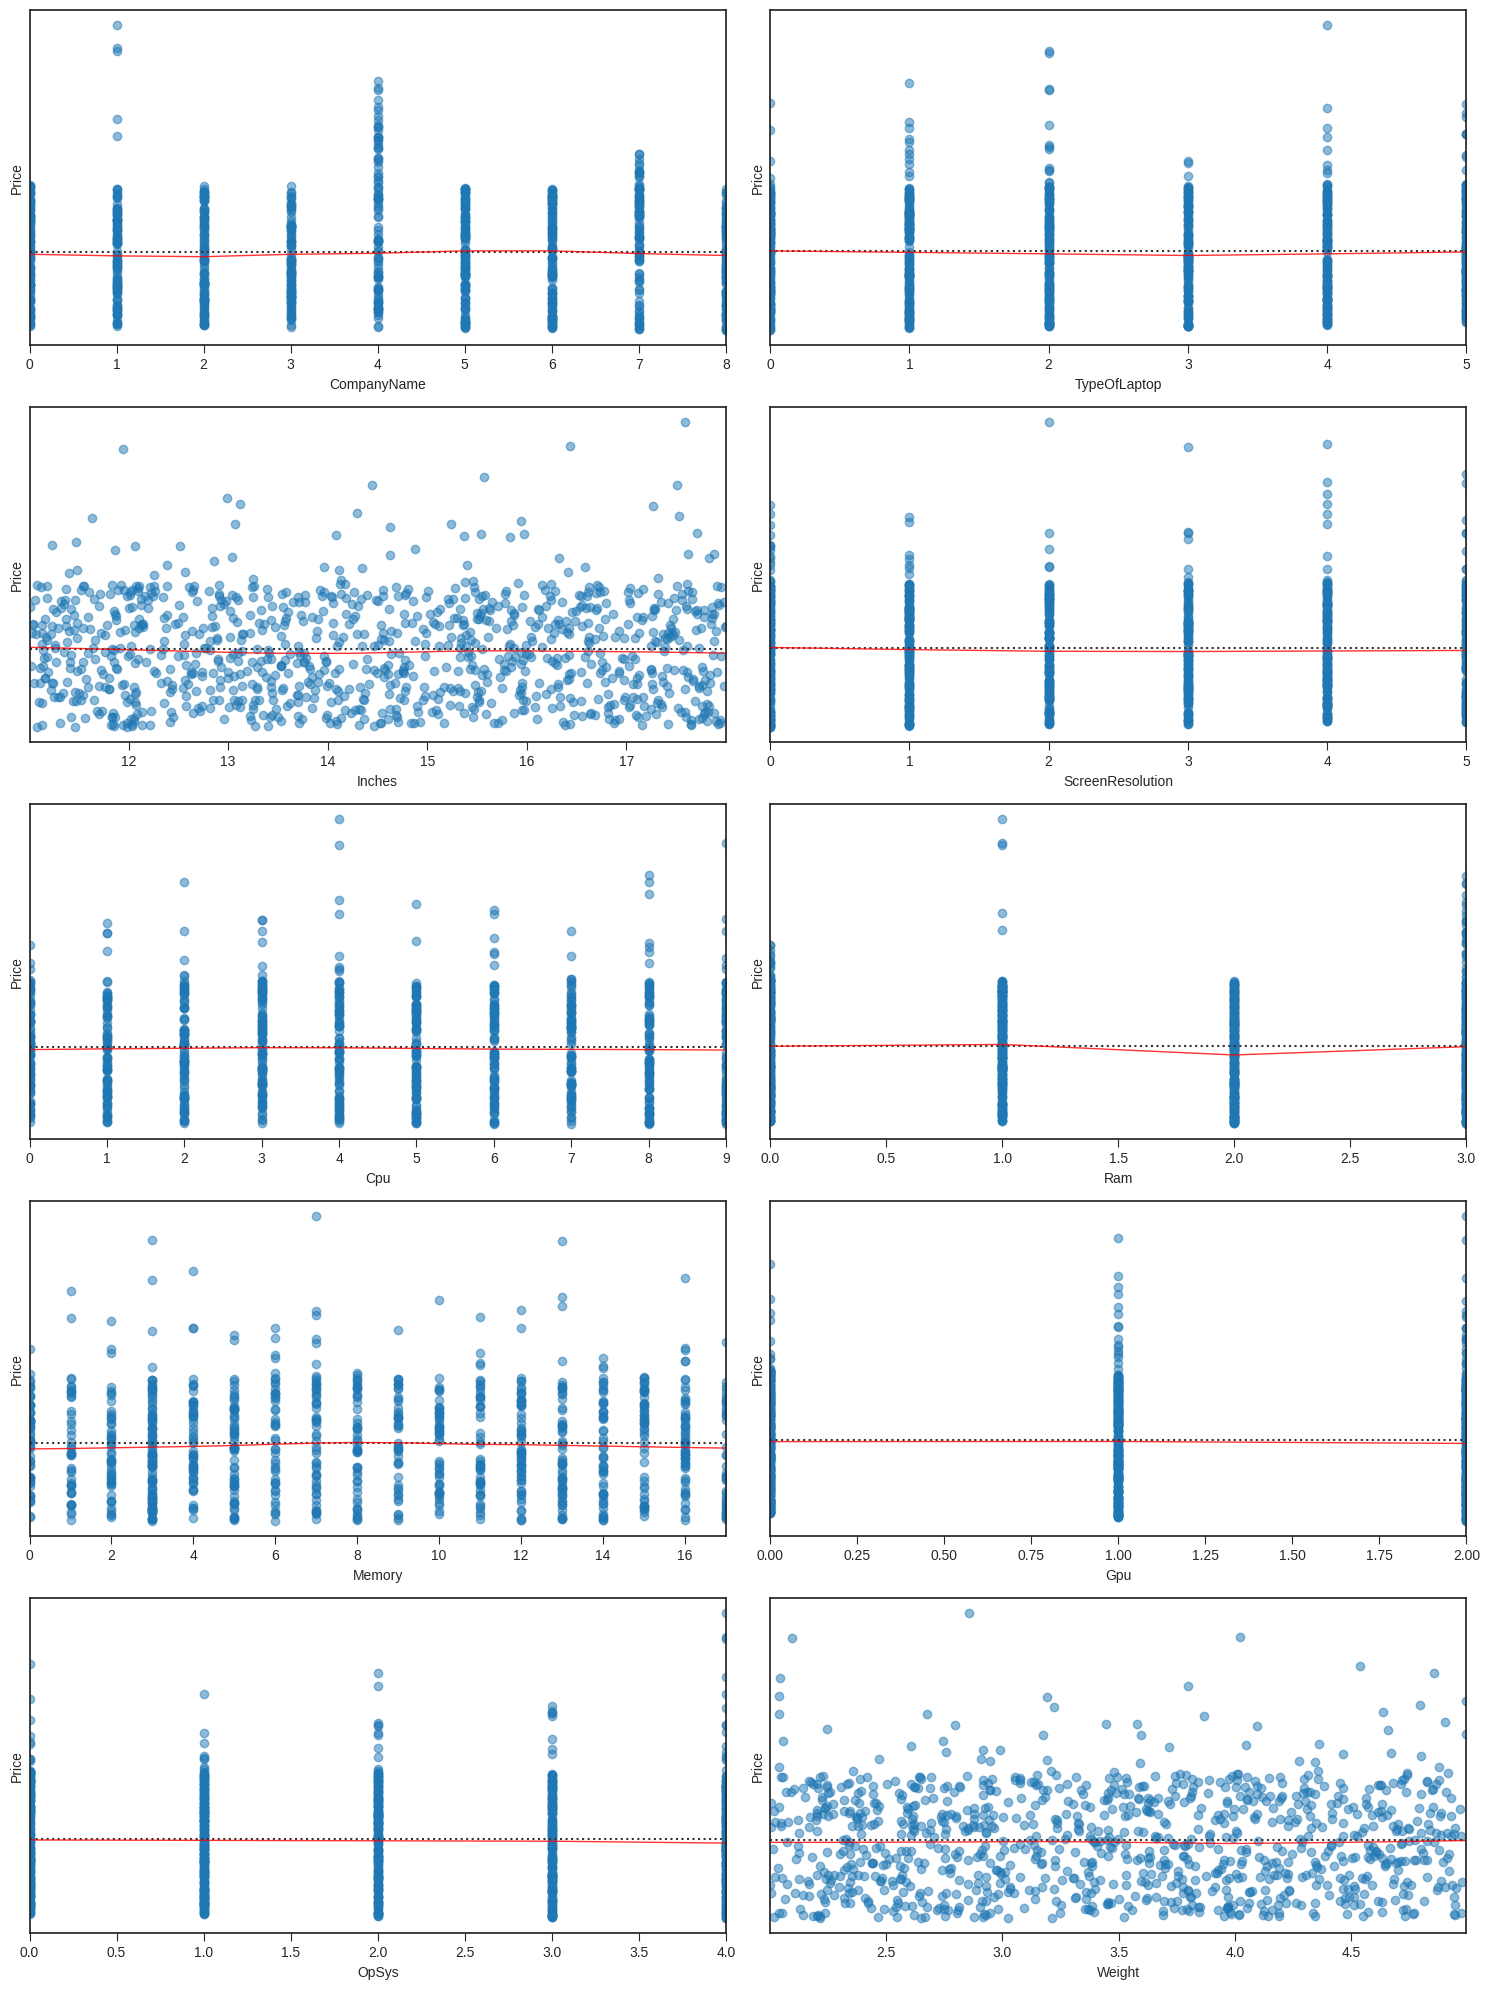

In [121]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(x=df_x.iloc[:, 0], y=df_y, lowess=True, ax=axes[0, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 1], y=df_y, lowess=True, ax=axes[0, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 2], y=df_y, lowess=True, ax=axes[1, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 3], y=df_y, lowess=True, ax=axes[1, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 4], y=df_y, lowess=True, ax=axes[2, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 5], y=df_y, lowess=True, ax=axes[2, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 6], y=df_y, lowess=True, ax=axes[3, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 7], y=df_y, lowess=True, ax=axes[3, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 8], y=df_y, lowess=True, ax=axes[4, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_x.iloc[:, 9], y=df_y, lowess=True, ax=axes[4, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})


plt.setp(axes, yticks=[])
plt.tight_layout()

In [122]:
df.describe()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,4.013000,2.510000,14.496646,2.397000,4.607000,1.536000,8.25500,1.00900,2.016000,3.469800,51602.255339
std,2.567377,1.720133,2.066624,1.700083,2.873118,1.133132,5.19432,0.82922,1.423295,0.857112,13802.833231
min,0.000000,0.000000,11.005842,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,2.000819,30060.275100
25%,2.000000,1.000000,12.677791,1.000000,2.000000,1.000000,3.00000,0.00000,1.000000,2.720228,40376.617670
50%,4.000000,2.000000,14.509298,2.000000,5.000000,2.000000,8.00000,1.00000,2.000000,3.477824,50683.971717
75%,6.000000,4.000000,16.313026,4.000000,7.000000,3.000000,13.00000,2.00000,3.000000,4.189891,61897.280126
max,8.000000,5.000000,17.998786,5.000000,9.000000,3.000000,17.00000,2.00000,4.000000,4.994556,115137.368077


In [123]:
#calculating minimum and maximum threshold
min_threshold, max_threshold = df.Price.quantile([0.01,0.95])
min_threshold, max_threshold

(30317.1523116235, 70476.53235555188)

In [124]:
# check
df[df.Price<min_threshold]

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
47,0,0,17.644447,1,6,2,12,0,2,3.023685,30080.225026
148,0,3,17.155837,0,3,0,5,0,3,3.520560,30196.692336
199,8,0,13.274713,3,2,3,6,1,3,4.943397,30080.515939
311,1,3,11.085621,0,7,2,3,2,0,3.210748,30060.275100
409,7,1,16.385321,5,0,2,14,2,4,4.142889,30225.588454
518,7,3,12.031192,1,5,2,13,1,0,2.878087,30295.016460
564,8,3,11.987830,5,4,0,12,2,3,4.728951,30094.710921
702,3,4,14.460670,3,9,0,14,0,4,4.343375,30142.557908
789,8,3,13.404957,0,8,0,16,1,2,4.547909,30148.321347
875,5,3,11.461191,5,5,0,9,1,4,4.188418,30127.690553


In [125]:
# filtering the outliers and saving the data to a new dataframe data2
df_cleaned = df[(df.Price>min_threshold)&(df.Price<max_threshold)]
df_cleaned.shape

(940, 11)

In [126]:
df_cleaned_x, df_cleaned_y = df_cleaned.iloc[:,:10], df_cleaned.iloc[:,-1]

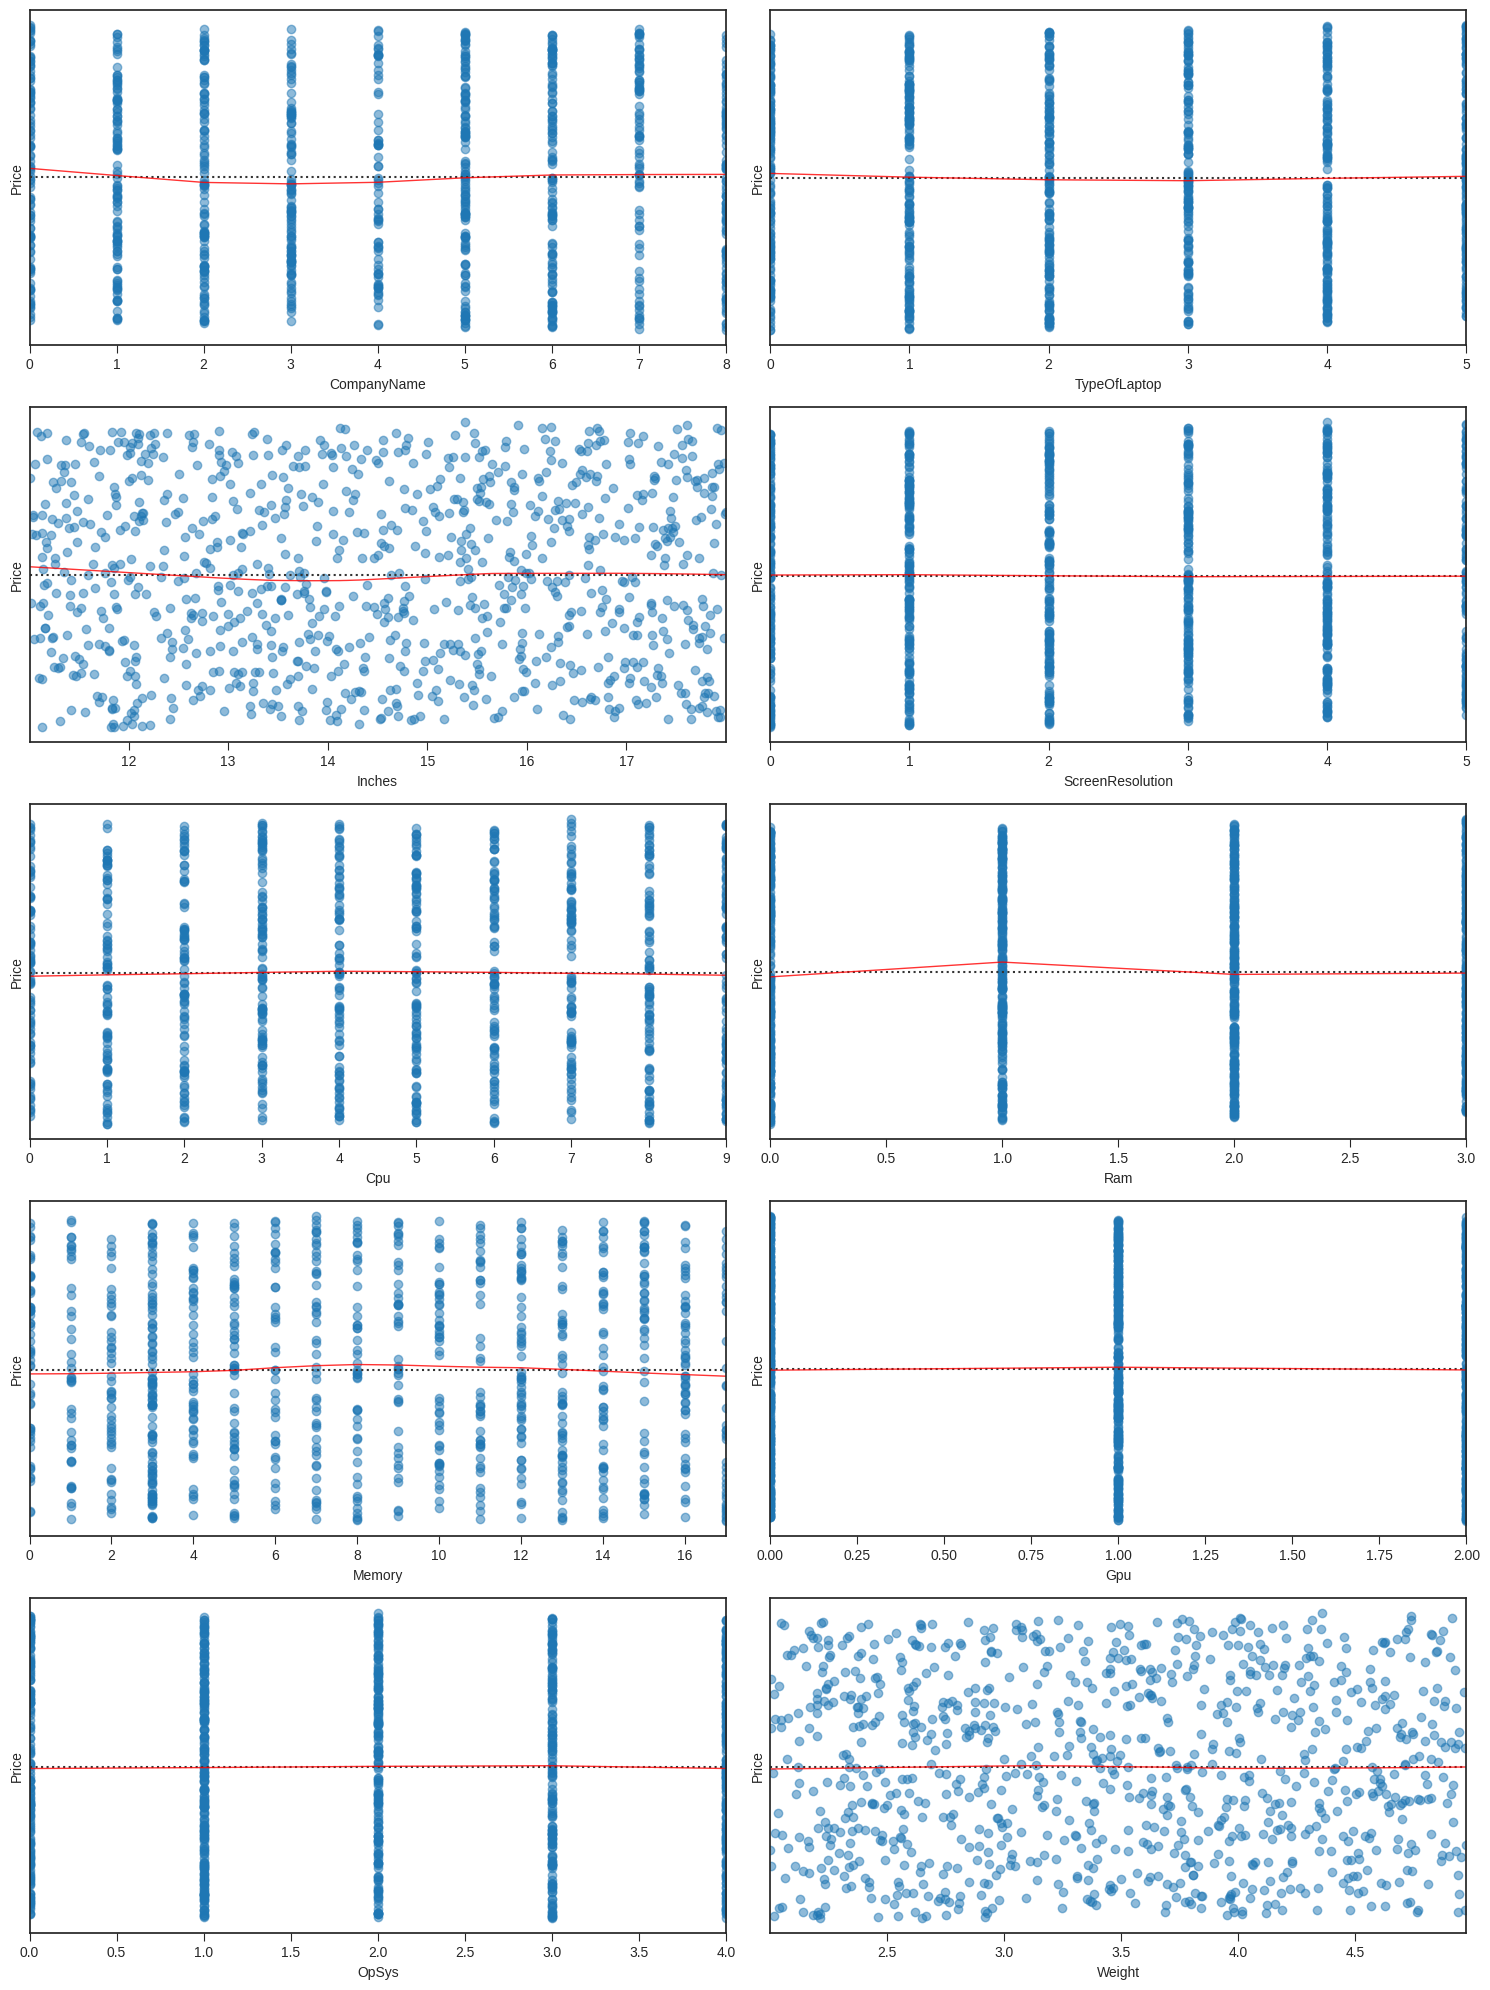

In [127]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(x=df_cleaned_x.iloc[:, 0], y=df_cleaned_y, lowess=True, ax=axes[0, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[0, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 2], y=df_cleaned_y, lowess=True, ax=axes[1, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 3], y=df_cleaned_y, lowess=True, ax=axes[1, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 4], y=df_cleaned_y, lowess=True, ax=axes[2, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 5], y=df_cleaned_y, lowess=True, ax=axes[2, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 6], y=df_cleaned_y, lowess=True, ax=axes[3, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 7], y=df_cleaned_y, lowess=True, ax=axes[3, 1],
              scatter_kws={'alpha': 0.5},

              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 8], y=df_cleaned_y, lowess=True, ax=axes[4, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 9], y=df_cleaned_y, lowess=True, ax=axes[4, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})



plt.setp(axes, yticks=[])
plt.tight_layout()

### Feature Selection and GridSearch
Since 'Price' is normalised to remove the skewness, Standard Scaler technique will be used to normalize the data set. Thus, each feature has 0 mean and 1 standard deviation.

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Dataframe df with outliers
df_x = scaler.fit_transform(df_x)
#Dataframe with no outliers
df_cleaned_x = scaler.fit_transform(df_cleaned_x)

### Q. Which predictor variables are the most important?

Now it is time to build a feature importance graph. For this Extra Trees Classifier method will be used. In the below code, lowess=True makes sure the lowest regression line is drawn.

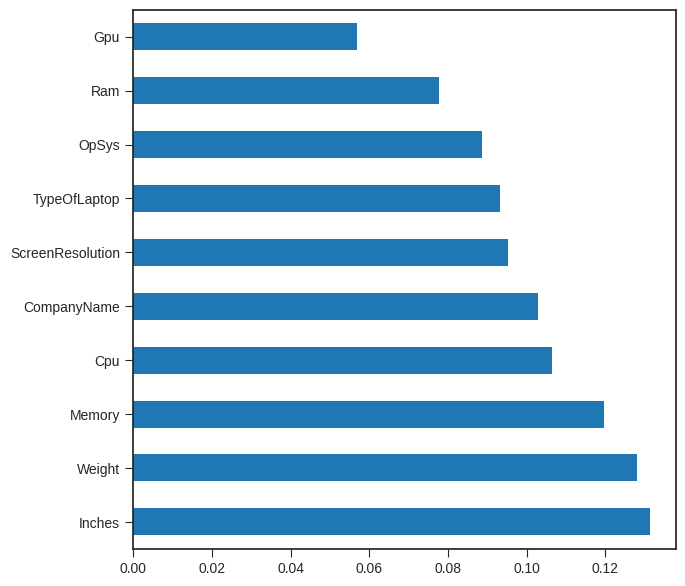

In [129]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(df_x,lab_enc.fit_transform(df_y))
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Model Buidling
Correlation matrix, Residual Plots and Multicollinearity results show that underfitting occurs on the model and there is no multicollinearity on the independent variables.

In model building section, Linear Regression model will be built.

### Linear Regression Model

In [130]:
#Linear Regression
def linear_reg(input_x, input_y, cv = 5):
    model_LR = LinearRegression()

    parameters = {'fir_intercept':[True, False], 'normalize':[True,False], 'copy_X':[True,False]}

    #Buidling Grid Search algorithm with cross-validation and Mearn Squared Error score

    grid_search_LR = GridSearchCV(estimator = model_LR,
                        param_grid = parameters,
                        scoring = 'neg_mean_squared_error',
                        cv = cv,
                        n_jobs = -1)

    #Finding the best parameters

    grid_search_LR.fir(input_x,input_y)
    best_parameters_LR = grid_search_LR.best_params_
    best_score_LR = grid_search_LR.best_score_
    print(best_parameters_LR)
    print(best_score_LR)

### Q. Do the training and test sets have the same data?

The train and test sets are split at a ratio of 70/30 from the same dataset. But both sets are distinct and is not seen by the model during the training phase.

### Phase 1
In this phase data is

In [131]:
#Splitting the dataset with outlier into Train and Test sets at 70-30 proportion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3,random_state=42)

In [132]:
##Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(copy_X= True, fit_intercept = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

### Phase 2

In [133]:
#Splitting the dataset with outlier into Train and Test sets at 70-30 proportion
Xclean_train, Xclean_test, yclean_train, yclean_test = train_test_split(df_cleaned_x, df_cleaned_y, test_size=0.3,random_state=42)
##Linear Regression
lr_clean = LinearRegression(copy_X= True, fit_intercept = True)
lr.fit(Xclean_train, yclean_train)
lr_clean_pred= lr.predict(Xclean_test)

### Result Comparison
In this part, 3 metrics will be calculated for evaluating predictions.

Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

R^2 will be calculated to find the goodness of fit measure.

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('-------------Linear Regression-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 %f' % r2_score(y_test, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(yclean_test, lr_clean_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(yclean_test, lr_clean_pred)))
print('R2 %f' % r2_score(yclean_test, lr_clean_pred))

-------------Linear Regression-----------
--Phase-1--
MAE: 11700.495883
RMSE: 14586.494742
R2 -0.003449
--Phase-2--
MAE: 10484.295003
RMSE: 12050.088842
R2 -0.005798


The output has evaluation metrics for the linear regression model in two phases (Phase-1 and Phase-2).

MAE (Mean Absolute Error):
Phase-1: 11700.495883
Phase-2: 10484.295003
MAE represents the average absolute differences between the predicted and actual values. Lower MAE indicates better performance.

RMSE (Root Mean Squared Error):
Phase-1: 14586.494742
Phase-2: 12050.088842
RMSE is another measure of the differences between predicted and actual values. It penalizes larger errors more significantly. As with MAE, a lower RMSE is desirable.

R2 (R-squared):
Phase-1: -0.003449
Phase-2: -0.005798
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

### Q. What are the distributions of the predictor variables?

<ipython-input-135-1a1d06db7ca9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], fit = norm)


Text(0.5, 1.0, 'Price Distribution Plot')

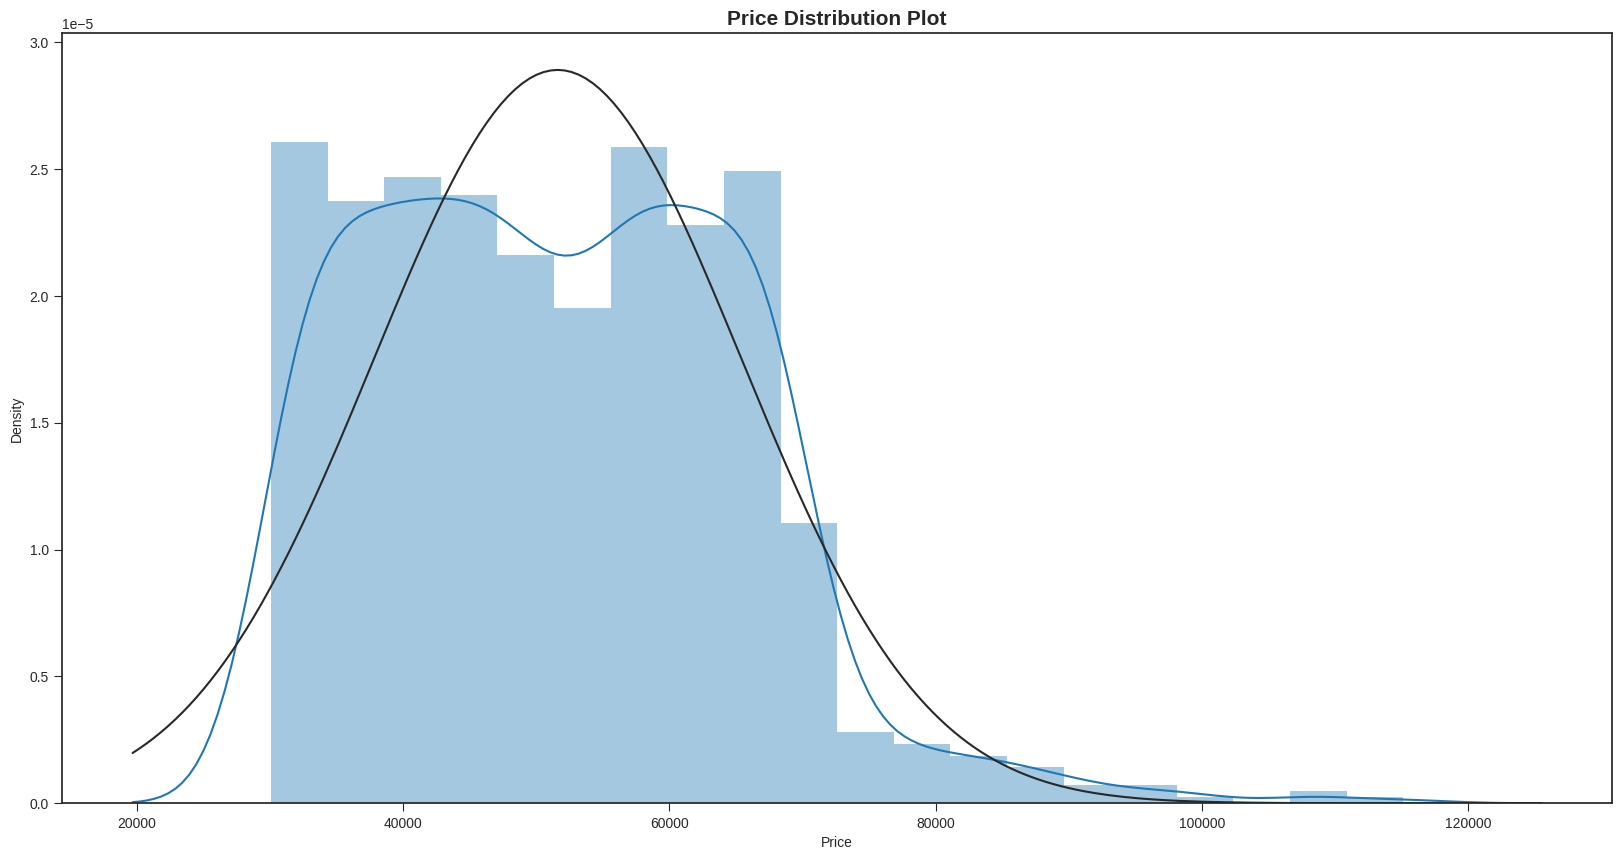

In [135]:
#Distribution of Price
from scipy.stats import norm
plt.figure(figsize=(20,10))
sns.distplot(df['Price'], fit = norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

This is a bimodal distribution with a right-skewed distribution for price. We can use log transformation to make it less skewed.

In [136]:
dfColumnList = df.columns

In [137]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,5,1,17.040680,5,6,0,15,1,0,2.064834,35844.099371
1,3,0,16.542395,2,5,0,0,1,1,4.060656,37019.059051
2,7,5,17.295294,2,9,3,3,1,0,2.901689,33329.360341
3,5,0,11.526203,0,6,1,14,1,2,2.914843,68631.102486
4,6,2,12.649634,2,5,3,15,0,2,4.341995,33842.479566


In [138]:
df['Price'] = np.log(df.Price+1)

<ipython-input-139-cd2f9c00ef83>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], fit=norm)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

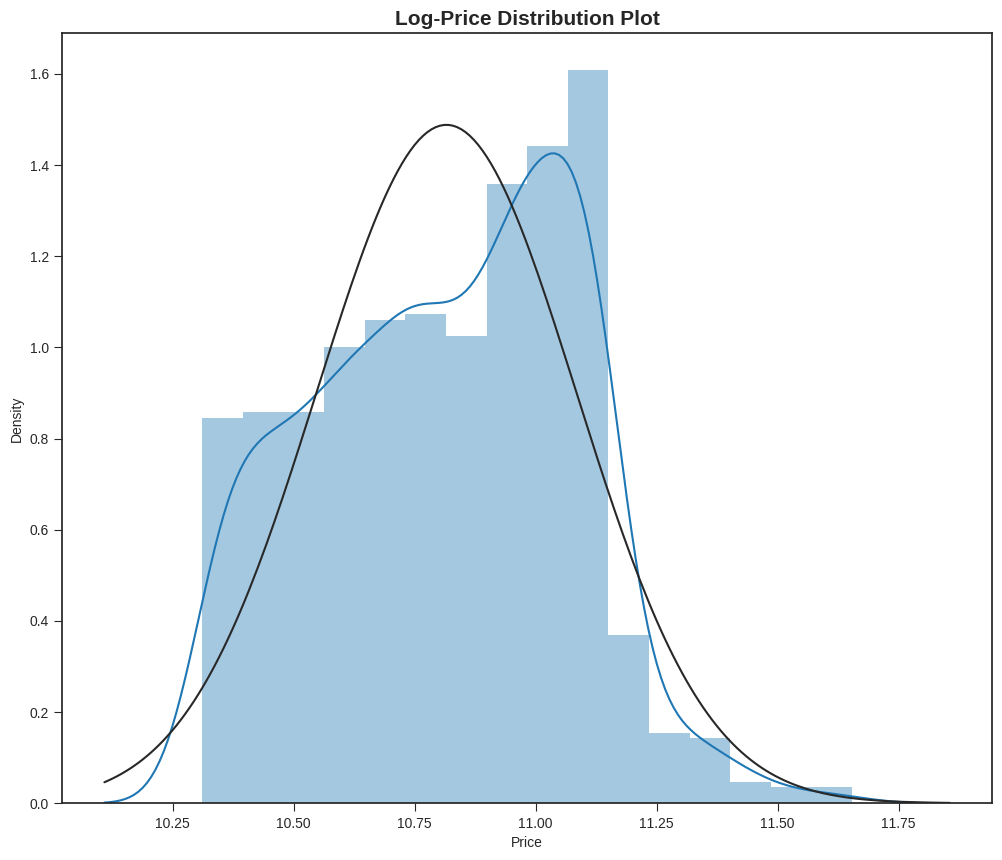

In [139]:
plt.figure(figsize=(12,10))
sns.distplot(df['Price'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

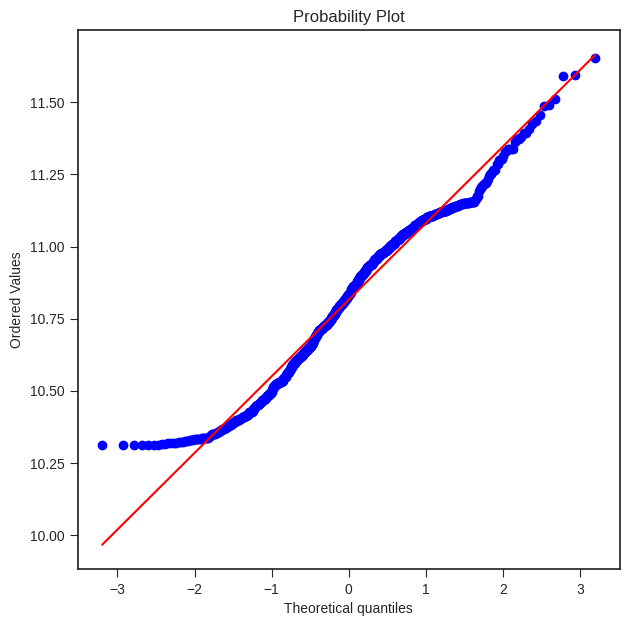

In [140]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
stats.probplot(df['Price'], plot=plt)
plt.show()

   Graph above indicates that normality is acceptable approximation.
   ### Distribution of Predictors

<ipython-input-141-e3c522923989>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)
<ipython-input-141-e3c522923989>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)
<ipython-input-141-e3c522923989>:4: UserWarning: 

`distplot` is a deprecated function and wil

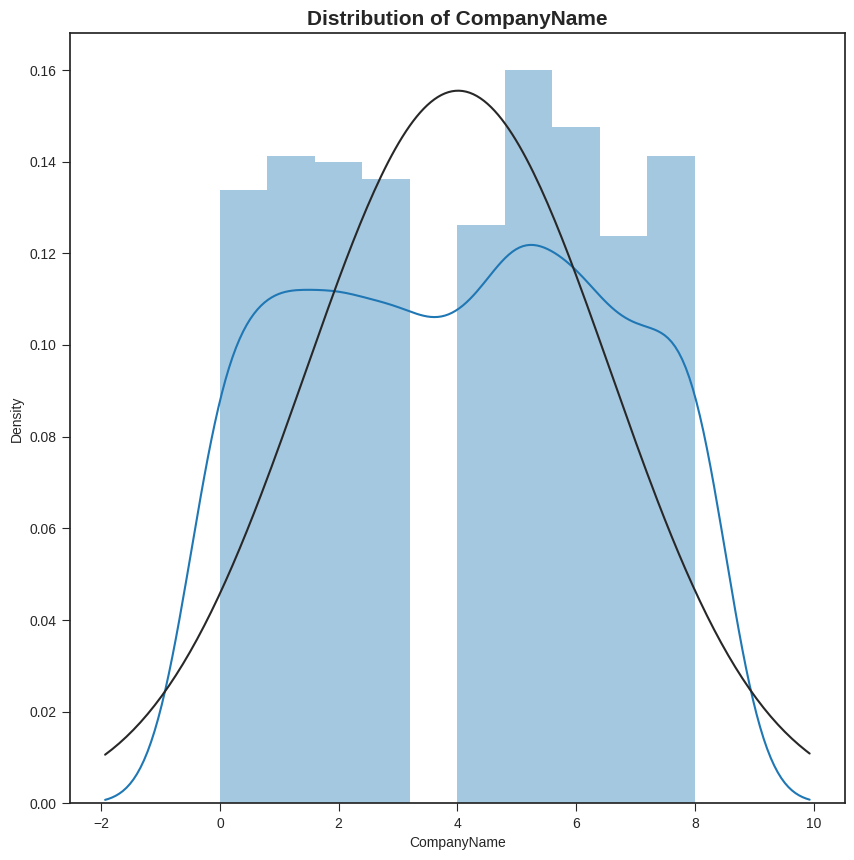

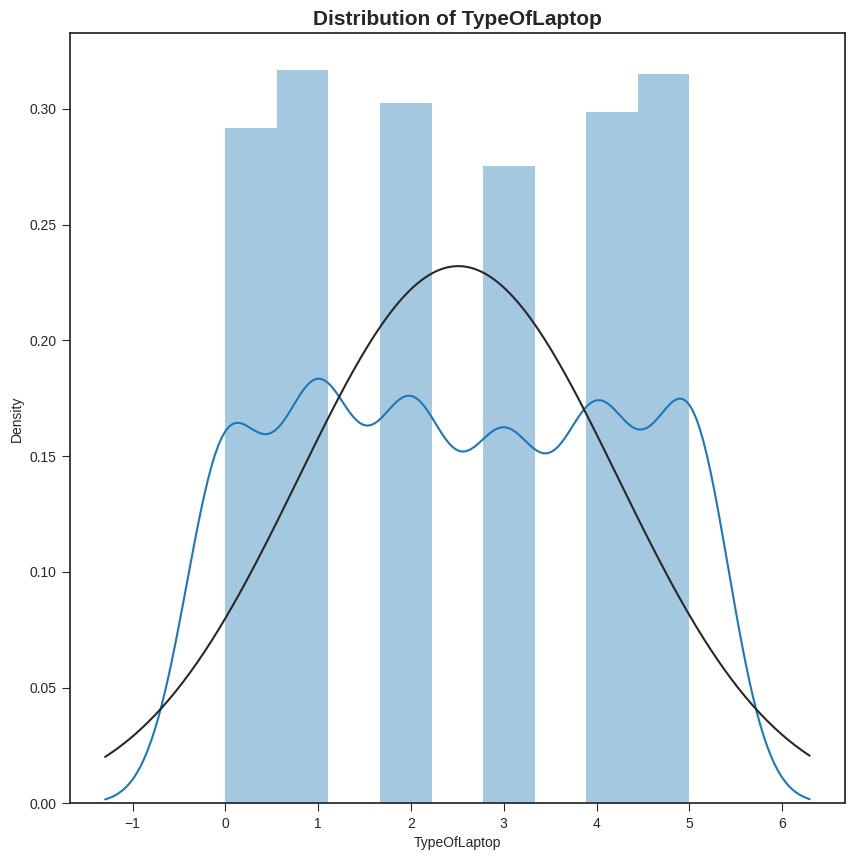

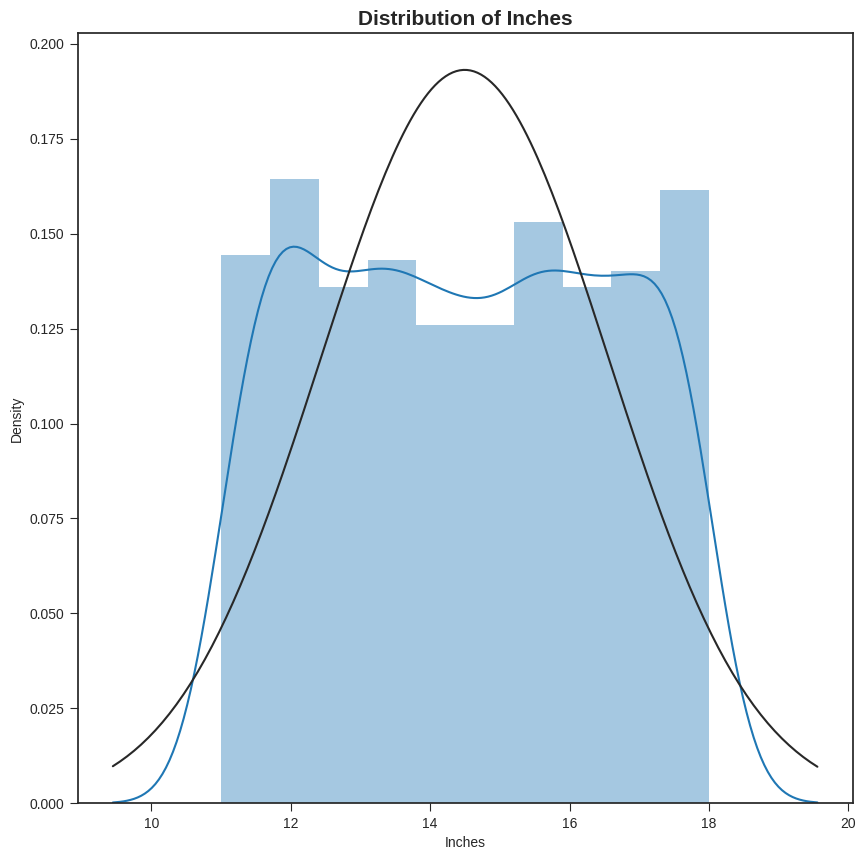

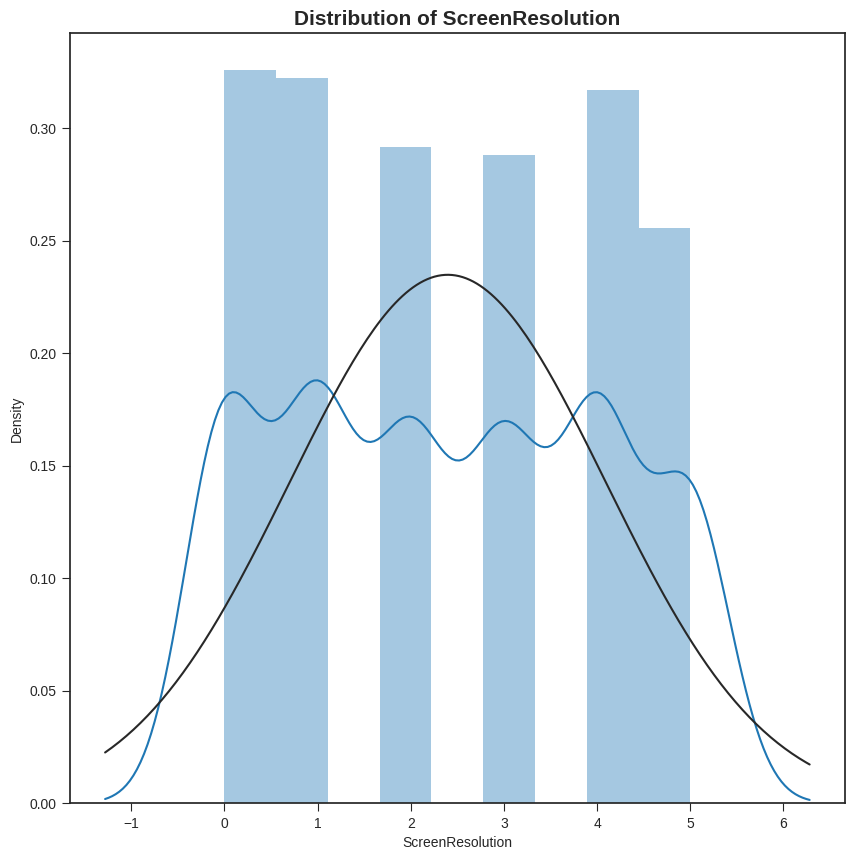

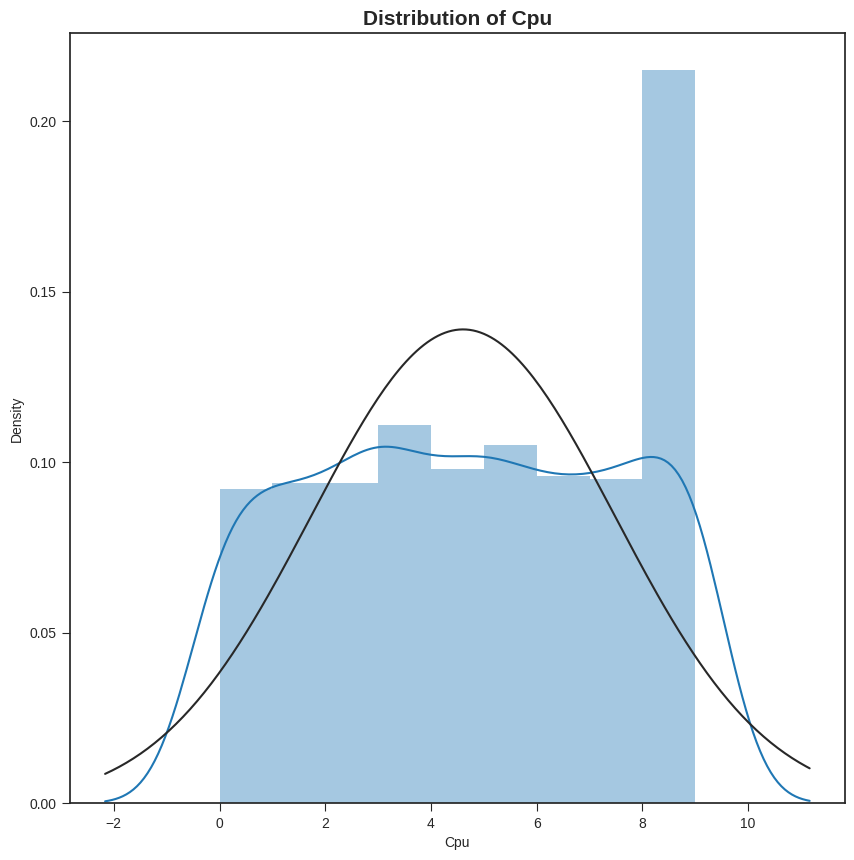

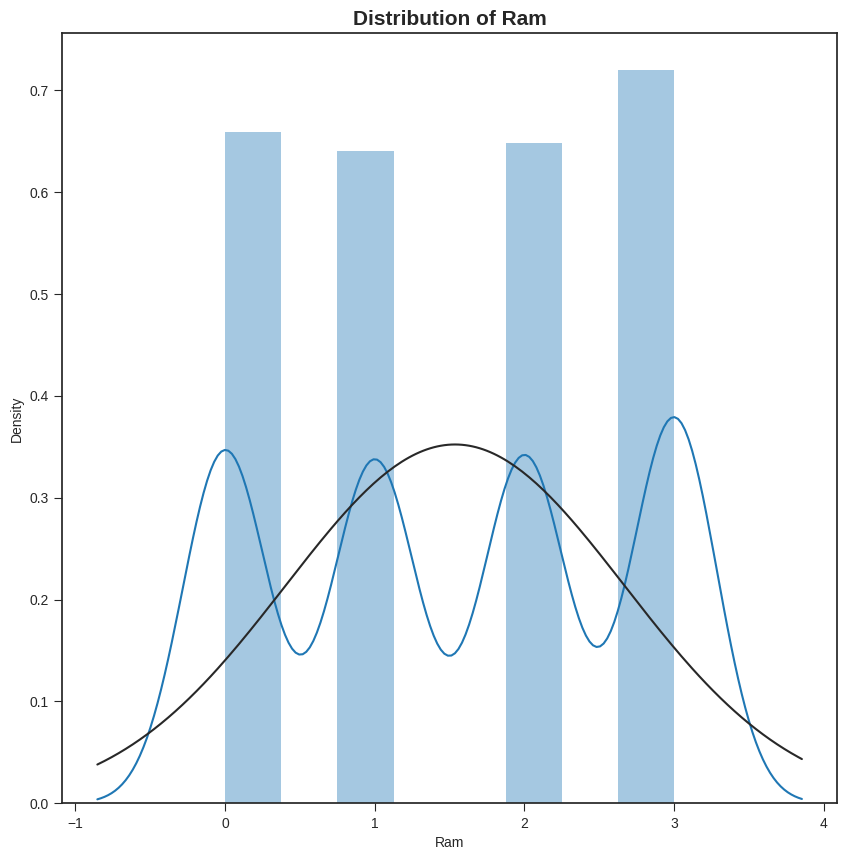

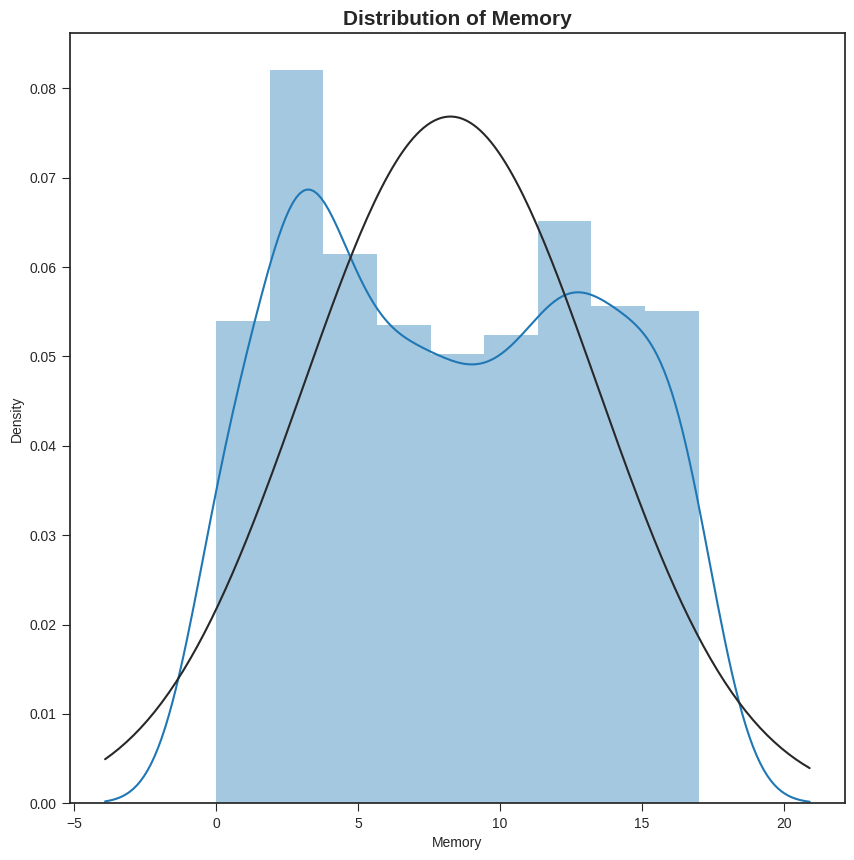

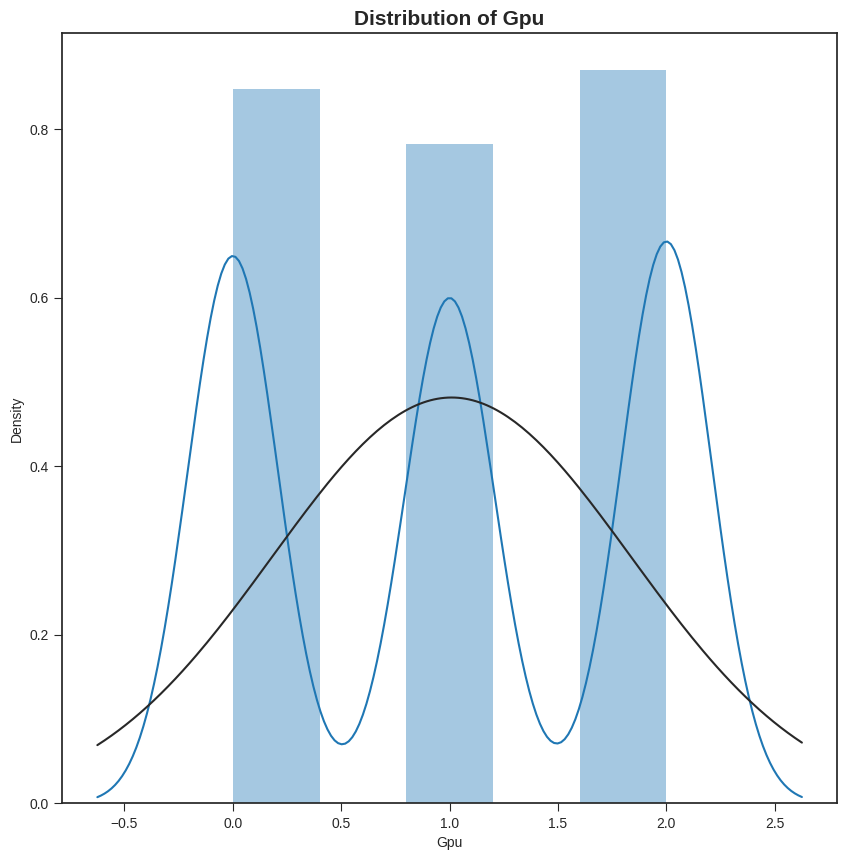

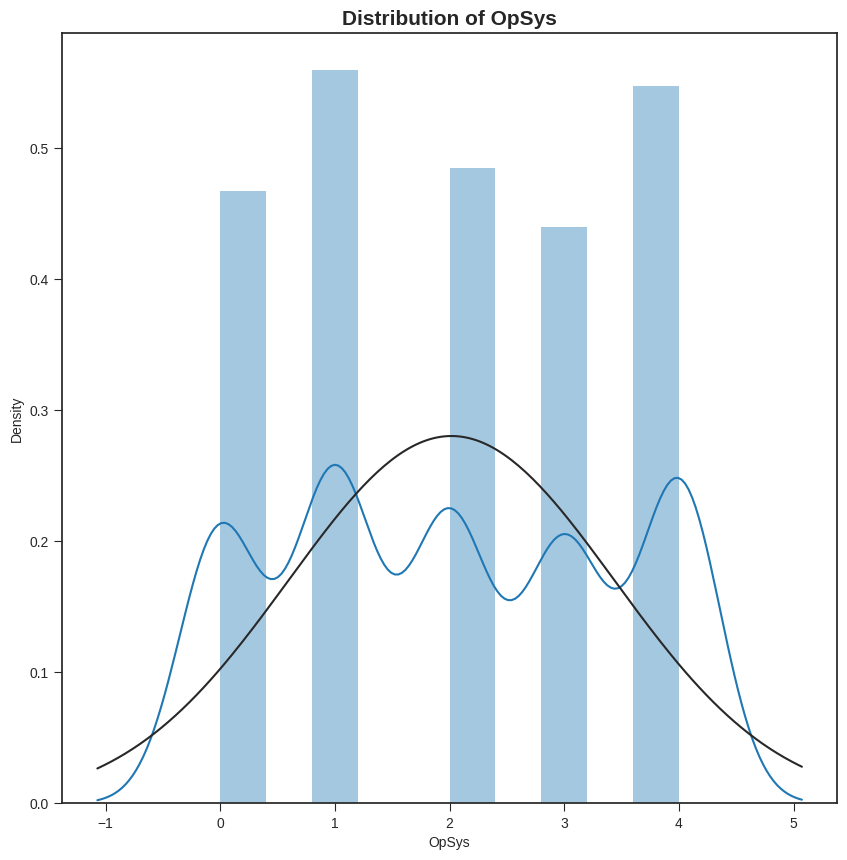

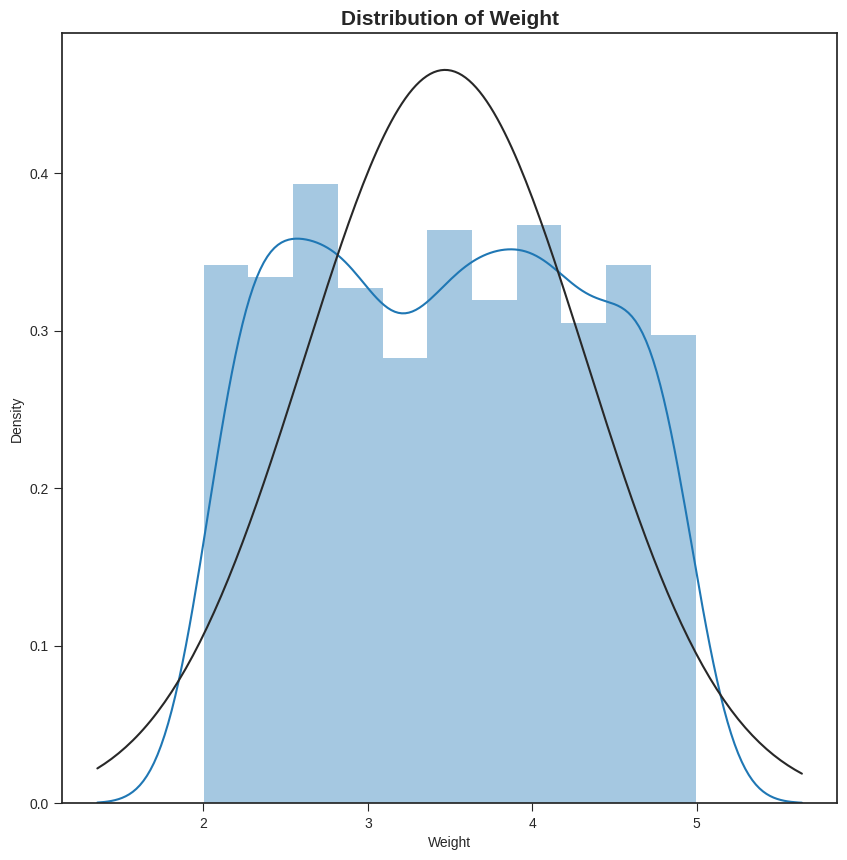

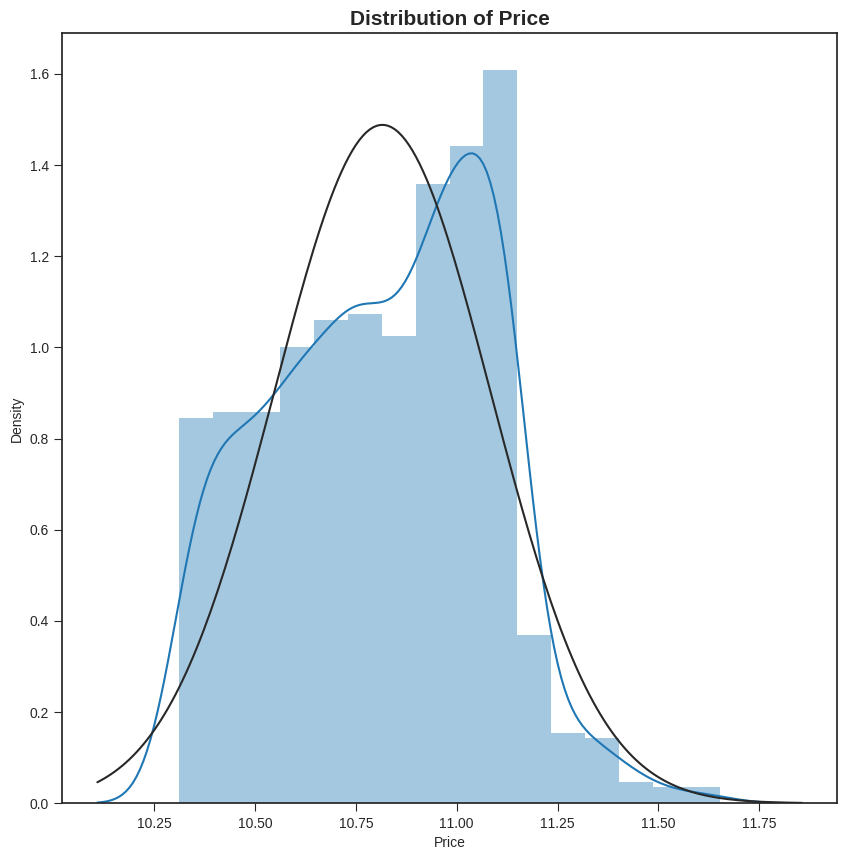

In [141]:
dfColumnList = df.columns
for i in dfColumnList:
  plt.figure(figsize= (10,10))
  sns.distplot(df[i], fit = norm)
  plt.title(f"Distribution of {i}",size = 15, weight = "bold")

### Q. Do the ranges of the predictor variables make sense?

In [142]:
#Range of each column
df.max() - df.min()

CompanyName          8.000000
TypeOfLaptop         5.000000
Inches               6.992944
ScreenResolution     5.000000
Cpu                  9.000000
Ram                  3.000000
Memory              17.000000
Gpu                  2.000000
OpSys                4.000000
Weight               2.993737
Price                1.342897
dtype: float64

The range of "Memory" variable is high.

### Q. In the predictor variables independent of all the other predictor variables?
To assess whether predictor variables are independent of each other, we have performed a correlation analysis. Specifically, calculated the correlation coefficients between pairs of predictor variables. If the correlation coefficients are close to zero, it indicates low correlation and suggests that the variables are relatively independent. On the other hand, higher correlation coefficients may suggest dependencies between variables.In the correlation matrix, values close to 1 or -1 indicate strong correlations, while values close to 0 suggest independence.

In [143]:
import pandas as pd
correlation_matrix = df.corr()
# Display the correlation matrix
print(correlation_matrix)

                  CompanyName  TypeOfLaptop    Inches  ScreenResolution  \
CompanyName          1.000000     -0.025076 -0.029582          0.023355   
TypeOfLaptop        -0.025076      1.000000  0.003842          0.034411   
Inches              -0.029582      0.003842  1.000000          0.049544   
ScreenResolution     0.023355      0.034411  0.049544          1.000000   
Cpu                  0.032855      0.023582 -0.003922         -0.014341   
Ram                  0.037516      0.042441  0.046565         -0.021196   
Memory               0.008909      0.048841 -0.016660         -0.033239   
Gpu                 -0.006638     -0.039012 -0.005662          0.014504   
OpSys               -0.052105     -0.016420  0.029764         -0.041928   
Weight               0.042223      0.027053  0.037982          0.001084   
Price                0.028620     -0.044312 -0.018140         -0.032028   

                       Cpu       Ram    Memory       Gpu     OpSys    Weight  \
CompanyName       0

### Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [156]:
df_imputation= df[['Price']]
df_imputation['1_percent'] = df_imputation[['Price']]
df_imputation['5_percent'] = df_imputation[['Price']]
df_imputation['10_percent'] = df_imputation[['Price']]
# df_imputation['sample_num'] = df_imputation[['Unnamed: 0']]
# df_imputation['sample_num'] = df_imputation['sample_num']/1000
df_imputation.head()

<ipython-input-156-72845b955b62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['1_percent'] = df_imputation[['Price']]
<ipython-input-156-72845b955b62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['5_percent'] = df_imputation[['Price']]
<ipython-input-156-72845b955b62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Price,1_percent,5_percent,10_percent
0,10.486962,10.486962,10.486962,10.486962
1,10.519215,10.519215,10.519215,10.519215
2,10.414224,10.414224,10.414224,10.414224
3,11.136516,11.136516,11.136516,11.136516
4,10.429502,10.429502,10.429502,10.429502


In [157]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [158]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
Price            Price              0.0
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [159]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [160]:
create_missing(df_imputation, 0.01, '1_percent')
create_missing(df_imputation, 0.05, '5_percent')
create_missing(df_imputation, 0.1, '10_percent')

<ipython-input-159-b0d10bbcf223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [161]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
Price            Price              0.0
1_percent    1_percent              1.0
5_percent    5_percent              5.0
10_percent  10_percent             10.0


In [162]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])

In [163]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")


Length of number_1_idx is 10 and it contains 1.0% of total data in column | Total rows: 1000
Length of number_5_idx is 50 and it contains 5.0% of total data in column | Total rows: 1000
Length of number_10_idx is 100 and it contains 10.0% of total data in column | Total rows: 1000


In [165]:
df_with_imputation = df.reset_index().rename(columns={'index': 'ID'})
df_imputation = df_imputation.reset_index().rename(columns={'index': 'ID'})

In [166]:
df_with_imputation = pd.merge(df_with_imputation, df_imputation, on='ID')
df_with_imputation.rename(columns={'Price_x': 'Price'}, inplace=True)
df_with_imputation = df_with_imputation.drop(columns=['Price_y'])


In [167]:
df_with_imputation

,ID,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,1_percent,5_percent,10_percent
0,0,5,1,17.040680,5,6,0,15,1,0,2.064834,10.486962,10.486962,10.486962,10.486962
1,1,3,0,16.542395,2,5,0,0,1,1,4.060656,10.519215,10.519215,10.519215,10.519215
2,2,7,5,17.295294,2,9,3,3,1,0,2.901689,10.414224,10.414224,10.414224,10.414224
3,3,5,0,11.526203,0,6,1,14,1,2,2.914843,11.136516,11.136516,11.136516,11.136516
4,4,6,2,12.649634,2,5,3,15,0,2,4.341995,10.429502,10.429502,10.429502,10.429502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7,2,16.242566,3,0,3,1,0,2,4.685053,10.603003,10.603003,10.603003,10.603003
996,996,6,5,17.450809,1,4,3,12,2,4,3.934182,10.955597,10.955597,10.955597,10.955597
997,997,8,3,13.761288,3,2,1,0,2,2,4.047468,10.783438,10.783438,10.783438,10.783438
998,998,2,4,11.038000,5,7,0,2,1,1,3.669825,10.984064,10.984064,10.984064,10.984064


### Random Forest Imputation

In [168]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

### For 1 Percent Imputation

In [169]:
df_imputation_1_percent = df_with_imputation[['ID', 'CompanyName', 'TypeOfLaptop', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', '1_percent']]

In [170]:
# Split the dataset into two parts: one with complete data and one with missing values
df_complete = df_imputation_1_percent.dropna()
df_missing = df_imputation_1_percent[df_imputation_1_percent.isnull().any(axis=1)]

# Identify the target column (the one with missing values)
target_column = 'Price'  # Replace with the actual target column name

# Identify the predictor columns (features)
predictor_columns = df.columns[df.columns != target_column]

# Separate features and target variable in the complete dataset
X_train = df_imputation_1_percent[predictor_columns]
y_train = df_imputation_1_percent[target_column]

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Use the trained model to predict missing values
X_missing = df_missing[predictor_columns]
predicted_values = rf_model.predict(X_missing)


# Use the trained model to predict missing values
X_missing = df_missing[predictor_columns]
predicted_values = rf_model.predict(X_missing)

In [171]:
# Calculate residuals
residuals = df_missing['Price'] - predicted_values
# Calculate percentage error on residuals
percentage_error = round((residuals / df_missing['Price']) * 100,2)


# Calculate mean absolute error (MAE) and root mean squared error (RMSE)
mae = round(mean_absolute_error(df_missing['Price'], predicted_values),4)
rmse = round(mean_squared_error(df_missing['Price'], predicted_values, squared=False),4)

print(f"Mean Squared Error : {round(mae,4)}")
print(f"Root Mean Squared Error: {round(rmse,4)}")


Mean Squared Error : 0.0682
Root Mean Squared Error: 0.0816


In [172]:
# Calculate bias and variance
bias = np.mean((predicted_values - np.mean(df_missing['Price']))**2)
variance = np.var(predicted_values)

# Print the results
print(f"Bias: {round(bias,4)}")
print(f"Variance: {round(variance,4)}")

Bias: 0.0179
Variance: 0.0179


### For 5 Percent Imputation

In [173]:
df_imputation_5_percent = df_with_imputation[['ID', 'CompanyName', 'TypeOfLaptop', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', '5_percent']]

In [174]:
# Split the dataset into two parts: one with complete data and one with missing values
df_complete = df_imputation_5_percent.dropna()
df_missing = df_imputation_5_percent[df_imputation_5_percent.isnull().any(axis=1)]

# Identify the target column (the one with missing values)
target_column = 'Price'  # Replace with the actual target column name

# Identify the predictor columns (features)
predictor_columns = df.columns[df.columns != target_column]

# Separate features and target variable in the complete dataset
X_train = df_imputation_5_percent[predictor_columns]
y_train = df_imputation_5_percent[target_column]

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Use the trained model to predict missing values
X_missing = df_missing[predictor_columns]
predicted_values = rf_model.predict(X_missing)


In [175]:
# Calculate residuals
residuals = df_missing['Price'] - predicted_values
# Calculate percentage error on residuals
percentage_error = round((residuals / df_missing['Price']) * 100,2)


# Calculate mean absolute error (MAE) and root mean squared error (RMSE)
mae = round(mean_absolute_error(df_missing['Price'], predicted_values),4)
rmse = round(mean_squared_error(df_missing['Price'], predicted_values, squared=False),4)

print(f"Mean Squared Error : {round(mae,4)}")
print(f"Root Mean Squared Error: {round(rmse,4)}")


Mean Squared Error : 0.0754
Root Mean Squared Error: 0.0901


In [176]:
# Calculate bias and variance
bias = np.mean((predicted_values - np.mean(df_missing['Price']))**2)
variance = np.var(predicted_values)

# Print the results
print(f"Bias: {round(bias,4)}")
print(f"Variance: {round(variance,4)}")

Bias: 0.0337
Variance: 0.0336


### For 10 Percent Imputation

In [177]:
df_imputation_10_percent = df_with_imputation[['ID', 'CompanyName', 'TypeOfLaptop', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', '5_percent']]

In [178]:
# Split the dataset into two parts: one with complete data and one with missing values
df_complete = df_imputation_10_percent.dropna()
df_missing = df_imputation_10_percent[df_imputation_5_percent.isnull().any(axis=1)]

# Identify the target column (the one with missing values)
target_column = 'Price'  # Replace with the actual target column name

# Identify the predictor columns (features)
predictor_columns = df.columns[df.columns != target_column]

# Separate features and target variable in the complete dataset
X_train = df_imputation_10_percent[predictor_columns]
y_train = df_imputation_10_percent[target_column]

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Use the trained model to predict missing values
X_missing = df_missing[predictor_columns]
predicted_values = rf_model.predict(X_missing)


In [179]:
# Calculate residuals
residuals = df_missing['Price'] - predicted_values
# Calculate percentage error on residuals
percentage_error = round((residuals / df_missing['Price']) * 100,2)


# Calculate mean absolute error (MAE) and root mean squared error (RMSE)
mae = round(mean_absolute_error(df_missing['Price'], predicted_values),4)
rmse = round(mean_squared_error(df_missing['Price'], predicted_values, squared=False),4)

print(f"Mean Squared Error : {round(mae,4)}")
print(f"Root Mean Squared Error: {round(rmse,4)}")


Mean Squared Error : 0.0776
Root Mean Squared Error: 0.0905


In [180]:
# Calculate bias and variance
bias = np.mean((predicted_values - np.mean(df_missing['Price']))**2)
variance = np.var(predicted_values)

# Print the results
print(f"Bias: {round(bias,4)}")
print(f"Variance: {round(variance,4)}")

Bias: 0.0342
Variance: 0.0341


The 10 Percent Imputation seems to perform the best overall, having the lowest MSE and RMSE. It strikes a balance between bias and variance.

The 5 Percent Imputation has the lowest bias and variance, indicating a stable and accurate model, but with slightly higher MSE and RMSE compared to 10 Percent Imputation.

The 1 Percent Imputation has the highest MSE and RMSE, suggesting the least accurate predictions among the three scenarios.

### KNN Imputation
A technique called the k nearest neighbours is used for basic categorization. To forecast the values of any new data points, the program makes advantage of "feature similarity." In other words, a value is assigned to the new point according on how much it resembles the points in the training set.


In [181]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [182]:
# imputed_number_df.sample(10)
imputed_number_df.head()

,1_percent,5_percent,10_percent
0,10.486962,10.486962,10.486962
1,10.519215,10.519215,10.519215
2,10.414224,10.414224,10.414224
3,11.136516,11.136516,11.136516
4,10.429502,10.429502,10.429502


In [183]:
print(get_percent_missing(imputed_number_df))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [184]:
price = df["Price"]
imputed_mean = pd.concat([price,imputed_number_df])
imputed_mean.columns = ["Price","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

Price         0.071954
1_Percent     0.071837
5_Percent     0.071839
10_Percent    0.071713
dtype: float64

There was very negotiable variability in the KNN-based technique. For the current dataset, this approach is therefore appropriate.

#### Mean based Imputation with Simpleimputer

To replace the missing values within each column independently of the others, first get the mean/median of the non-missing values in that column. It is limited to use with numerical data.




In [185]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]

In [186]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [187]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [188]:
price = df["Price"]
combined_mean = pd.concat([price,imputed_mean])
combined_mean.mean()

0             10.815729
1_percent     10.816028
5_percent     10.814011
10_percent    10.811642
dtype: float64

The Mean based method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.

